In [1]:
import requests
from bs4 import BeautifulSoup



In [2]:
# URL of the webpage to scrape
#url = "https://solardiscount.at/collections/pv-komplettanlage?sort_by=best-selling"
url = "https://solardiscount.at/collections/solarmodule?sort_by=best-selling"

# Download the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.content
    print("Webpage downloaded successfully")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully


In [9]:
import os
from urllib.parse import urlparse

# Extract the original file name from the URL
parsed_url = urlparse(url)
file_name = os.path.basename(parsed_url.path)

if not file_name:  # In case the path ends with a slash
    file_name = 'index.html'
else:
    file_name += '.html'

# Parse the HTML to extract the body content
soup = BeautifulSoup(html_content, 'html.parser')
body_content = soup.body

# Ensure body_content is not None and prettify it
pretty_body_content = body_content.prettify() if body_content else ''


# Save the body content to a file in the current folder with the original file name
with open(file_name, 'w', encoding='utf-8') as file:
    file.write(pretty_body_content)
print(f"Body content saved to {file_name} in the current folder")


Body content saved to solarmodule.html in the current folder


In [10]:
from bs4 import BeautifulSoup

# Assuming you already have the HTML content in html_content
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the specific div with class "main-products-grid__results" and id "filter-results"
products_div = soup.find('div', class_='main-products-grid__results', id='filter-results')

# Function to extract product details
def extract_product_details(product_card):
    # Extract module name
    title_tag = product_card.find('p', class_='card__title')
    module_name = title_tag.get_text(strip=True) if title_tag else "No module name"
    
    # Extract product link
    link_tag = title_tag.find('a') if title_tag else None
    link = link_tag['href'] if link_tag else "No link"
    
    # Extract manufacturer
    manufacturer_tag = product_card.find('p', class_='card__vendor')
    manufacturer = manufacturer_tag.get_text(strip=True) if manufacturer_tag else "No manufacturer"
    
    # Extract current price
    price_tag = product_card.find('strong', class_='price__current')
    current_price = price_tag.get_text(strip=True) if price_tag else "No current price"
    
    # Extract wattage from module name (assuming it's in the module name)
    wattage = None
    if module_name:
        import re
        wattage_match = re.search(r'\b(\d+W)\b', module_name)
        wattage = wattage_match.group(1) if wattage_match else "No wattage"
    
    return {
        'module_name': module_name,
        'manufacturer': manufacturer,
        'price': current_price,
        'wattage': wattage,
        'link': link
    }

# Extract and print product details
if products_div:
    product_cards = products_div.find_all('product-card')
    for product_card in product_cards:
        product_details = extract_product_details(product_card)
        print(product_details)
else:
    print("The specified div was not found in the HTML content.")


{'module_name': 'DAH Solarmodul 415W Black Frame', 'manufacturer': 'DAH Solar', 'price': '€108,25', 'wattage': '415W', 'link': '/collections/solarmodule/products/dah-solarmodul-415w-black-frame'}
{'module_name': 'DAH Solarmodul 380W Black Frame', 'manufacturer': 'DAH Solar', 'price': '€83,25', 'wattage': '380W', 'link': '/collections/solarmodule/products/dah-solarmodul-380w-black-frame'}
{'module_name': 'JA Solar Solarmodul 435W Glas-Glas Full Black Bifacial', 'manufacturer': 'JA Solar', 'price': '€84,90', 'wattage': '435W', 'link': '/collections/solarmodule/products/ja-solar-solarmodul-435w-glas-glas-full-black'}
{'module_name': 'JA Solar Solarmodul 415W Black Frame', 'manufacturer': 'JA Solar', 'price': '€74,90', 'wattage': '415W', 'link': '/collections/solarmodule/products/ja-solar-solarmodul-415w-black-frame'}
{'module_name': 'DAH Solarmodul 430W Bifacial Full Black', 'manufacturer': 'DAH Solar', 'price': '€84,90', 'wattage': '430W', 'link': '/collections/solarmodule/products/dah-s

In [11]:
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the HTML content in html_content
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the specific div with class "main-products-grid__results" and id "filter-results"
products_div = soup.find('div', class_='main-products-grid__results', id='filter-results')

# Function to extract product details
def extract_product_details(product_card):
    # Extract module name
    title_tag = product_card.find('p', class_='card__title')
    module_name = title_tag.get_text(strip=True) if title_tag else "No module name"
    
    # Extract product link
    link_tag = title_tag.find('a') if title_tag else None
    link = link_tag['href'] if link_tag else "No link"
    
    # Extract manufacturer
    manufacturer_tag = product_card.find('p', class_='card__vendor')
    manufacturer = manufacturer_tag.get_text(strip=True) if manufacturer_tag else "No manufacturer"
    
    # Extract current price
    price_tag = product_card.find('strong', class_='price__current')
    current_price = price_tag.get_text(strip=True).replace('€', '').replace(',', '.') if price_tag else None
    current_price = float(current_price) if current_price else None
    
    # Extract wattage from module name (assuming it's in the module name)
    wattage = None
    if module_name:
        wattage_match = re.search(r'\b(\d+)W\b', module_name)
        wattage = float(wattage_match.group(1)) if wattage_match else None
    
    return {
        'module_name': module_name,
        'manufacturer': manufacturer,
        'price': current_price,
        'wattage': wattage,
        'link': link,
        'price_per_watt': current_price / wattage if current_price and wattage else None
    }

# Extract product details and calculate €/W price
product_details_list = []
if products_div:
    product_cards = products_div.find_all('product-card')
    for product_card in product_cards:
        product_details = extract_product_details(product_card)
        if product_details['price_per_watt'] is not None:
            product_details_list.append(product_details)
else:
    print("The specified div was not found in the HTML content.")

# Calculate median €/W price
prices_per_watt = [product['price_per_watt'] for product in product_details_list]
median_price_per_watt = np.median(prices_per_watt)
print(f"Median €/W price: €{median_price_per_watt:.2f}/W")


Median €/W price: €0.20/W


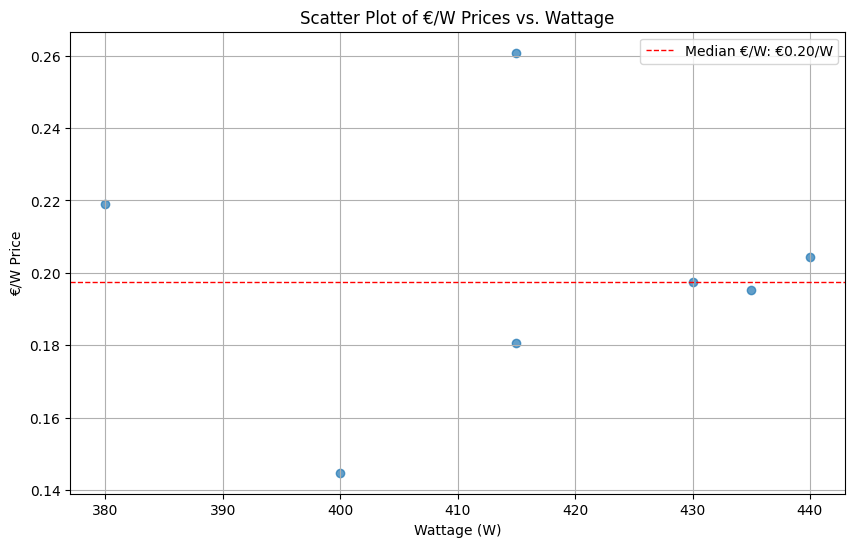

In [12]:
import matplotlib.pyplot as plt

# Extract wattages and €/W prices for the scatter plot
wattages = [product['wattage'] for product in product_details_list]
prices_per_watt = [product['price_per_watt'] for product in product_details_list]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(wattages, prices_per_watt, alpha=0.7)
plt.axhline(median_price_per_watt, color='red', linestyle='dashed', linewidth=1, label=f'Median €/W: €{median_price_per_watt:.2f}/W')
plt.title('Scatter Plot of €/W Prices vs. Wattage')
plt.xlabel('Wattage (W)')
plt.ylabel('€/W Price')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Sort the product details list by price
sorted_product_details = sorted(product_details_list, key=lambda x: x['price'])

# Print the sorted product details
for idx, product in enumerate(sorted_product_details, start=1):
    print(f"Rank {idx}:")
    print(f"  Module Name: {product['module_name']}")
    print(f"  Manufacturer: {product['manufacturer']}")
    print(f"  Price: €{product['price']:.2f}")
    print(f"  Wattage: {product['wattage']}W")
    print(f"  €/W: €{product['price_per_watt']:.2f}/W")
    print(f"  Link: {product['link']}")
    print()


Rank 1:
  Module Name: RISEN Solarmodul 400W Full Black
  Manufacturer: RISEN
  Price: €57.90
  Wattage: 400.0W
  €/W: €0.14/W
  Link: /collections/solarmodule/products/risen-solarmodul-400w-full-black

Rank 2:
  Module Name: JA Solar Solarmodul 415W Black Frame
  Manufacturer: JA Solar
  Price: €74.90
  Wattage: 415.0W
  €/W: €0.18/W
  Link: /collections/solarmodule/products/ja-solar-solarmodul-415w-black-frame

Rank 3:
  Module Name: DAH Solarmodul 380W Black Frame
  Manufacturer: DAH Solar
  Price: €83.25
  Wattage: 380.0W
  €/W: €0.22/W
  Link: /collections/solarmodule/products/dah-solarmodul-380w-black-frame

Rank 4:
  Module Name: JA Solar Solarmodul 435W Glas-Glas Full Black Bifacial
  Manufacturer: JA Solar
  Price: €84.90
  Wattage: 435.0W
  €/W: €0.20/W
  Link: /collections/solarmodule/products/ja-solar-solarmodul-435w-glas-glas-full-black

Rank 5:
  Module Name: DAH Solarmodul 430W Bifacial Full Black
  Manufacturer: DAH Solar
  Price: €84.90
  Wattage: 430.0W
  €/W: €0.20/W

In [14]:
from bs4 import BeautifulSoup
import re
import numpy as np

# Assuming you already have the HTML content in html_content
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the specific div with class "main-products-grid__results" and id "filter-results"
products_div = soup.find('div', class_='main-products-grid__results', id='filter-results')

# Function to extract product details
def extract_product_details(product_card, index):
    # Extract module name
    title_tag = product_card.find('p', class_='card__title')
    module_name = title_tag.get_text(strip=True) if title_tag else "No module name"
    
    # Extract product link
    link_tag = title_tag.find('a') if title_tag else None
    link = link_tag['href'] if link_tag else "No link"
    
    # Extract manufacturer
    manufacturer_tag = product_card.find('p', class_='card__vendor')
    manufacturer = manufacturer_tag.get_text(strip=True) if manufacturer_tag else "No manufacturer"
    
    # Extract current price
    price_tag = product_card.find('strong', class_='price__current')
    current_price = price_tag.get_text(strip=True).replace('€', '').replace(',', '.') if price_tag else None
    current_price = float(current_price) if current_price else None
    
    # Extract wattage from module name (assuming it's in the module name)
    wattage = None
    if module_name:
        wattage_match = re.search(r'\b(\d+)W\b', module_name)
        wattage = float(wattage_match.group(1)) if wattage_match else None
    
    return {
        'original_index': index,
        'module_name': module_name,
        'manufacturer': manufacturer,
        'price': current_price,
        'wattage': wattage,
        'link': link,
        'price_per_watt': current_price / wattage if current_price and wattage else None
    }

# Extract product details and calculate €/W price
product_details_list = []
if products_div:
    product_cards = products_div.find_all('product-card')
    for index, product_card in enumerate(product_cards):
        product_details = extract_product_details(product_card, index + 1)
        if product_details['price_per_watt'] is not None:
            product_details_list.append(product_details)
else:
    print("The specified div was not found in the HTML content.")

# Calculate median €/W price
prices_per_watt = [product['price_per_watt'] for product in product_details_list]
median_price_per_watt = np.median(prices_per_watt)
print(f"Median €/W price: €{median_price_per_watt:.2f}/W")


Median €/W price: €0.20/W


In [16]:
# Sort the product details list by price
sorted_product_details = sorted(product_details_list, key=lambda x: x['price'])

# Print the sorted product details
for idx, product in enumerate(sorted_product_details, start=1):
    print(f"Rank by Price {idx}:")
    print(f"  Original Popularity Rank: {product['original_index']}")
    print(f"  Module Name: {product['module_name']}")
    print(f"  Manufacturer: {product['manufacturer']}")
    print(f"  Price: €{product['price']:.2f}")
    print(f"  Wattage: {product['wattage']}W")
    print(f"  €/W: €{product['price_per_watt']:.2f}/W")
    print(f"  Link: {product['link']}")
    print()


Rank by Price 1:
  Original Popularity Rank: 7
  Module Name: RISEN Solarmodul 400W Full Black
  Manufacturer: RISEN
  Price: €57.90
  Wattage: 400.0W
  €/W: €0.14/W
  Link: /collections/solarmodule/products/risen-solarmodul-400w-full-black

Rank by Price 2:
  Original Popularity Rank: 4
  Module Name: JA Solar Solarmodul 415W Black Frame
  Manufacturer: JA Solar
  Price: €74.90
  Wattage: 415.0W
  €/W: €0.18/W
  Link: /collections/solarmodule/products/ja-solar-solarmodul-415w-black-frame

Rank by Price 3:
  Original Popularity Rank: 2
  Module Name: DAH Solarmodul 380W Black Frame
  Manufacturer: DAH Solar
  Price: €83.25
  Wattage: 380.0W
  €/W: €0.22/W
  Link: /collections/solarmodule/products/dah-solarmodul-380w-black-frame

Rank by Price 4:
  Original Popularity Rank: 3
  Module Name: JA Solar Solarmodul 435W Glas-Glas Full Black Bifacial
  Manufacturer: JA Solar
  Price: €84.90
  Wattage: 435.0W
  €/W: €0.20/W
  Link: /collections/solarmodule/products/ja-solar-solarmodul-435w-gla